In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [6]:
TRAIN_DIR = "./data/training_images/"
TEST_DIR = "./data/testing_images/"

In [4]:
df = pd.read_csv("./data/train_solution_bounding_boxes (1).csv")
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [23]:
def draw_boundingbox(ax, bbox, linewidth = 1, color = "r"):
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=linewidth, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

## Show example

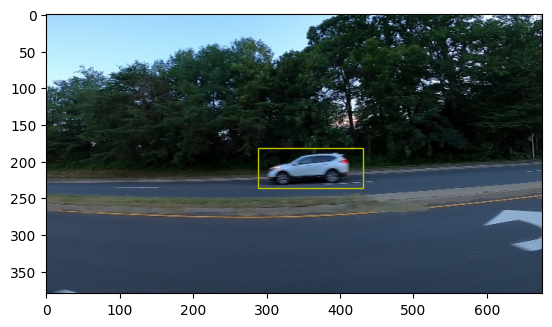

In [30]:
sample = df.sample()
image_name = sample.image.values[0]
bboxes = df.query("image == @image_name")

img = plt.imread(f"{TRAIN_DIR}{image_name}")
fig, ax = plt.subplots()
plt.imshow(img)

for i, bbox in bboxes.iterrows():
    x, y, w, h = bbox.xmin, bbox.ymin, bbox.xmax - bbox.xmin, bbox.ymax - bbox.ymin
    draw_boundingbox(ax, (x, y, w, h), color="y")

## Show anchorboxes

In [62]:
rx = tf.range(img.shape[0], dtype=tf.float32)
ry = tf.range(img.shape[1], dtype=tf.float32)
centers = tf.stack(tf.meshgrid(rx, ry), axis=-1)
centers = tf.expand_dims(centers, axis=-2)
centers = tf.tile(centers, [1, 1, 9, 1])
centers

<tf.Tensor: shape=(676, 380, 9, 2), dtype=float32, numpy=
array([[[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  1.,   0.],
         [  1.,   0.],
         [  1.,   0.],
         ...,
         [  1.,   0.],
         [  1.,   0.],
         [  1.,   0.]],

        [[  2.,   0.],
         [  2.,   0.],
         [  2.,   0.],
         ...,
         [  2.,   0.],
         [  2.,   0.],
         [  2.,   0.]],

        ...,

        [[377.,   0.],
         [377.,   0.],
         [377.,   0.],
         ...,
         [377.,   0.],
         [377.,   0.],
         [377.,   0.]],

        [[378.,   0.],
         [378.,   0.],
         [378.,   0.],
         ...,
         [378.,   0.],
         [378.,   0.],
         [378.,   0.]],

        [[379.,   0.],
         [379.,   0.],
         [379.,   0.],
         ...,
         [379.,   0.],
         [379.,   0.],
         [379.,   0.]]],


  

TypeError: Invalid shape (676, 380, 2) for image data

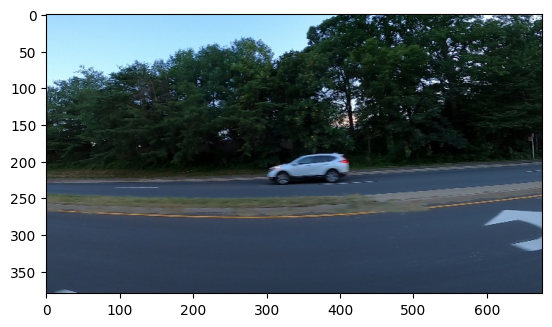

In [53]:
fig, ax = plt.subplots()
plt.imshow(img)
plt.imshow(centers)